In [34]:
import os
import uuid
import numpy as np
from PIL import Image  # Import the Image class from the PIL (Pillow) library
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Ftrl
import pandas as pd  # Import the Pandas library
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical


In [79]:
train_dir = "..\isec-ic\\dataset\\train"
validation_dir = "..\isec-ic\\dataset\\valid"
test_dir = "..\isec-ic\\dataset\\test"

#output_dir = "results\\" # 10 classes (included earlyblight and targetspot)
output_dir = "base_results\\"  # excluded earlyblight and targetspot

current_dir = os.path.dirname(os.path.realpath(__file__ if '__file__' in locals() else os.getcwd()))

train_dir = os.path.join(current_dir, train_dir)
validation_dir = os.path.join(current_dir, validation_dir)
test_dir = os.path.join(current_dir, test_dir)
# , "earlyblight",  "targetspot"
categories = ["bacterialspot", "healthy",  "lateblight","leafmold", "mosaicvirus","yellowleafcurlvirus" ,"spidermite","septorialeafspot"]

In [80]:
def load_images_from_folder(folder):
    images = []
    labels = []
    subfolders = os.listdir(folder)  # list of subfolders in the main folder
    
    for subfolder in subfolders:
        category = subfolder.split("_")[-1].lower()  # category of the subfolder (e.g., "scab" from "Apple___Apple_scab")
        
        if category in categories:
            print("Loading images from category: " + category + " and subfolder: " + subfolder)
            subfolder_path = os.path.join(folder, subfolder)
            
            for filename in os.listdir(subfolder_path):
                img = Image.open(os.path.join(subfolder_path, filename))
                img = img.resize((64, 64)) # default is 256
                img = np.array(img) / 255.0  # normalization of the pixel values between 0 and 1
                images.append(img)
                labels.append(categories.index(category))  # index of the category in the list of categories
        else:
            print("Category: " + category + " from subfolder " + subfolder + " is not in the list of categories.")

    return np.array(images), np.array(labels)

In [81]:
x_train, y_train = load_images_from_folder(train_dir)
print("Finished to load the train images")

x_validation, y_validation = load_images_from_folder(validation_dir)
print("Finished to load the validation images")

x_test, y_test = load_images_from_folder(test_dir)
print("Finished to load the test images");

Loading images from category: spidermite and subfolder: Tomato__spidermite
Loading images from category: bacterialspot and subfolder: Tomato___Bacterialspot
Category: earlyblight from subfolder Tomato___Earlyblight is not in the list of categories.
Loading images from category: healthy and subfolder: Tomato___healthy
Loading images from category: lateblight and subfolder: Tomato___Lateblight
Loading images from category: leafmold and subfolder: Tomato___Leafmold
Loading images from category: septorialeafspot and subfolder: Tomato___Septorialeafspot
Category: targetspot from subfolder Tomato___Targetspot is not in the list of categories.
Loading images from category: mosaicvirus and subfolder: Tomato___Tomato_mosaicvirus
Loading images from category: yellowleafcurlvirus and subfolder: Tomato___Tomato_yellowleafcurlvirus
Finished to load the train images
Loading images from category: bacterialspot and subfolder: Tomato___Bacterialspot
Category: earlyblight from subfolder Tomato___Earlybl

In [86]:
total_epochs = 100
model_uuid = uuid.uuid4()
learning_rate = 0.001
# adam, sgd, rmsprop, adadelta, Nadam, adagrad, ftrl
optimizer_name = "adam"
# sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
loss_function = "sparse_categorical_crossentropy"
size_img = "64x64"

total_neuronios_camada_1 = 128 # default era 128
total_neuronios_camada_2 = 64 # default era 64 
total_neuronios_camada_3 = 32
# relu, elu, sigmoid, tanh, leaky_relu, swish
activation_function = "elu" # default was relu

print("Updated variables")

# Display the total number of images loaded
print("Number of training images: " + str(len(x_train)))
print("Number of validation images: " + str(len(x_validation)))
print("Number of test images: " + str(len(x_test)))

print("Creating the MLP network")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)), # original is 256,256 ( 3 porque as imagens estão a cores, se fosse preto e branco seriam 1 )
    keras.layers.Dense(total_neuronios_camada_1, activation=activation_function), # default was relu
    keras.layers.Dense(total_neuronios_camada_2, activation=activation_function), # default was relu
    keras.layers.Dense(total_neuronios_camada_3, activation=activation_function), # default was relu
    keras.layers.Dense(8, activation='softmax') # we have 8 different classes to classify
])

print("Finished creating the MLP Model")

print("Starting to train and validate the model")

if optimizer_name.lower() == "adam":
    optimizer = Adam(learning_rate=learning_rate)
elif optimizer_name.lower() == "sgd":
    optimizer = SGD(learning_rate=learning_rate)
elif optimizer_name.lower() == "rmsprop":
    optimizer = RMSprop(learning_rate=learning_rate)
elif optimizer_name.lower() == "adadelta":
    optimizer = Adadelta()
    learning_rate = 0
elif optimizer_name.lower() == "nadam":
    optimizer = Nadam(learning_rate=learning_rate)
elif optimizer_name.lower() == "adagrad":
    optimizer = Adagrad(learning_rate=learning_rate)
elif optimizer_name.lower() == "ftrl":
    optimizer = Ftrl(learning_rate=learning_rate)
else:
    print("optimizer not detected")
    # Lidar com outros otimizadores, se necessário
    
    
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=total_epochs, validation_data=(x_validation, y_validation))
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

print("train acc: " + str(train_accuracy))
print("validation acc: " + str(validation_accuracy))

print("Finished training and validating the model")

Updated variables
Number of training images: 12000
Number of validation images: 3200
Number of test images: 800
Creating the MLP network
Finished creating the MLP Model
Starting to train and validate the model
Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 1.5549 - accuracy: 0.4557 - val_loss: 1.2350 - val_accuracy: 0.5619
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 1.1117 - accuracy: 0.6012 - val_loss: 1.0240 - val_accuracy: 0.6391
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.9549 - accuracy: 0.6640 - val_loss: 0.9962 - val_accuracy: 0.6488
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.8567 - accuracy: 0.6996 - val_loss: 0.8719 - val_accuracy: 0.6809
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 0.7560 - accuracy: 0.7383 - val_loss: 0.6436 - val_accuracy: 0.7772
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 

25/25 [==============================] - 0s 2ms/step
Global Accuracy: 90.00%


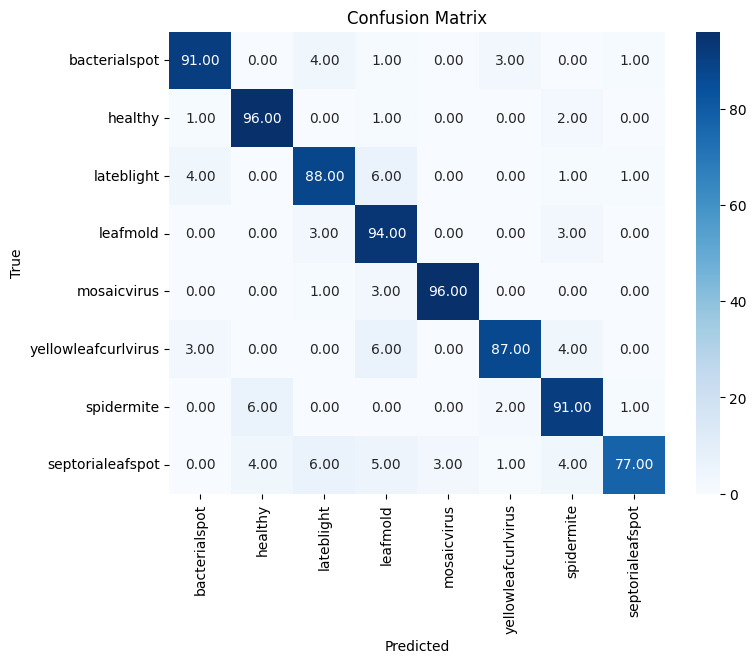

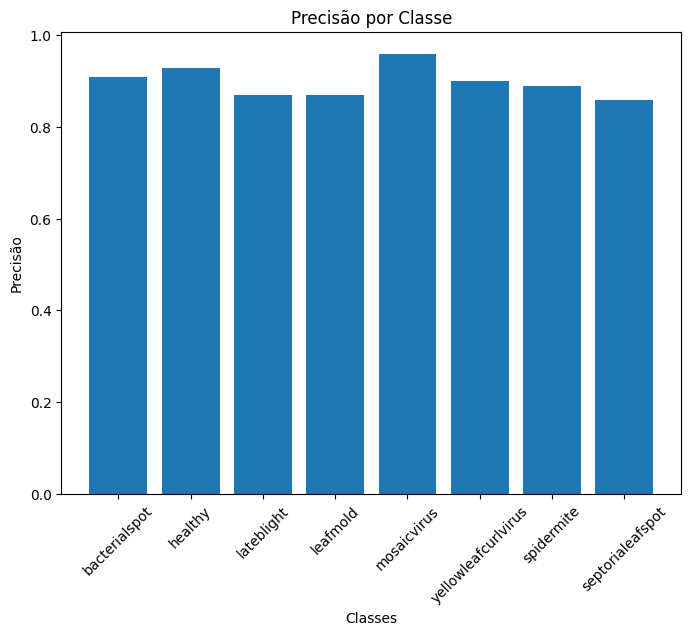

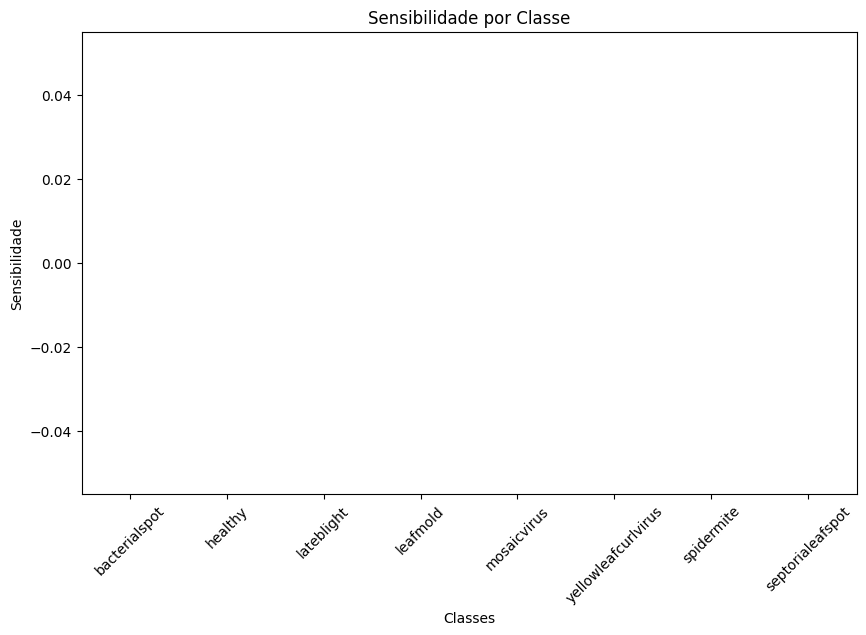

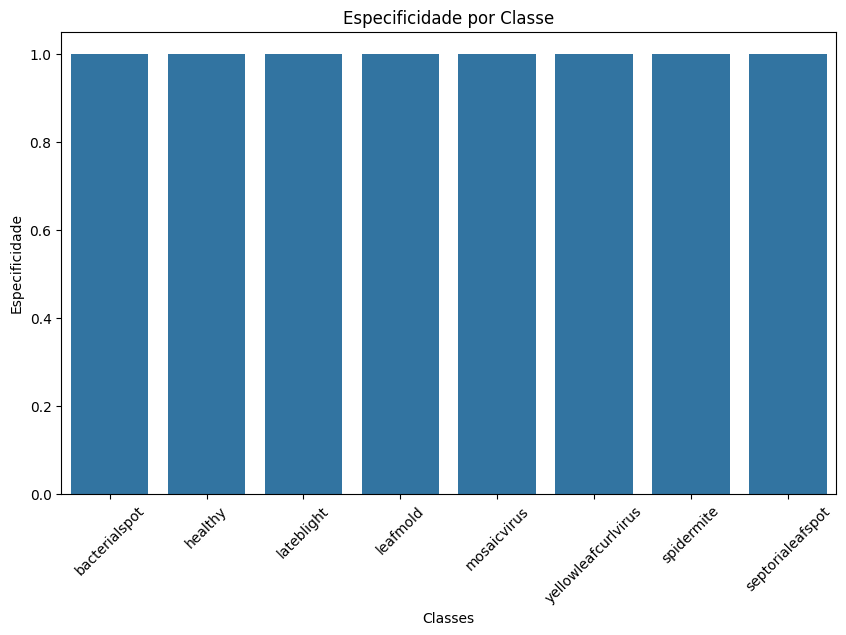

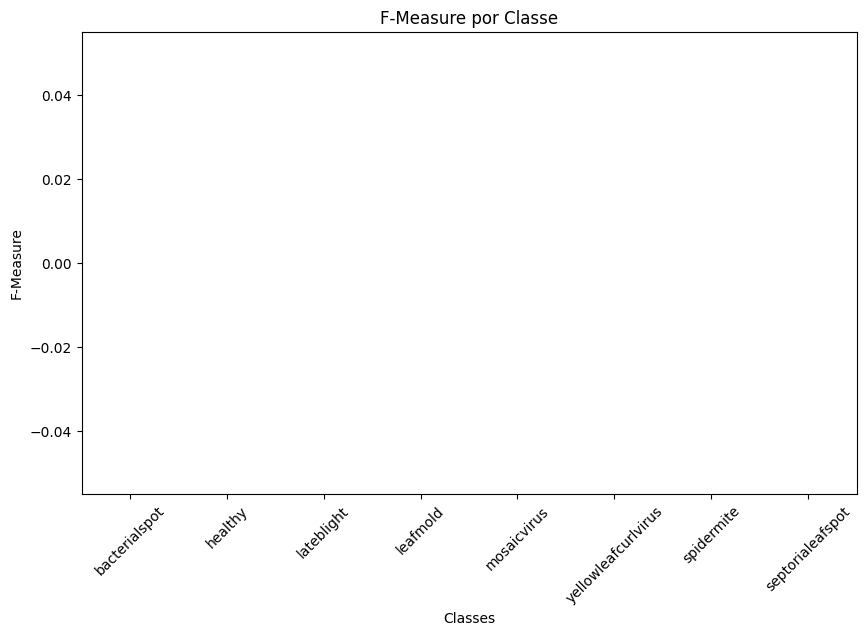

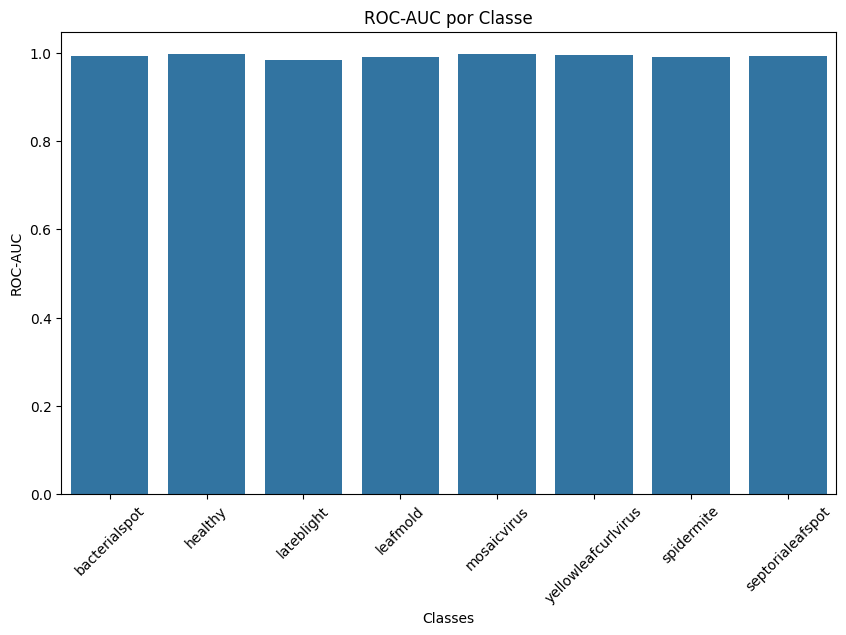

Model Saved Successfully: c9bf1579-113c-49c1-9e84-d133de01d2f3


In [87]:
total_classes_name = f"{str(len(categories))}_classes"

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Cálculo da precisão global (global accuracy)
global_accuracy = accuracy_score(y_test, y_pred_classes)
print("Global Accuracy: {:.2f}%".format(global_accuracy * 100))


file_name_confusion = f"{output_dir}{model_uuid}_confusion_matrix_{optimizer_name}_lr{learning_rate}_epochs{total_epochs}_lf{loss_function}_{size_img}_nc1_{total_neuronios_camada_1}_{activation_function}_nc2_{total_neuronios_camada_2}_{activation_function}_{total_classes_name}.png"
file_name_precision = f"{output_dir}{model_uuid}_precision_{optimizer_name}_lr{learning_rate}_epochs{total_epochs}_lf{loss_function}_{size_img}_nc1_{total_neuronios_camada_1}_{activation_function}_nc2_{total_neuronios_camada_2}_{activation_function}__{total_classes_name}.png"
model_file_name = f"{output_dir}{global_accuracy}_{model_uuid}_model_{optimizer_name}_lr{learning_rate}_epochs{total_epochs}_lf{loss_function}_{size_img}_nc1_{total_neuronios_camada_1}_{activation_function}_nc2_{total_neuronios_camada_2}_{activation_function}__{total_classes_name}.keras"


# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_classes)
row_sums = confusion.sum(axis=1, keepdims=True)
percent_confusion = (confusion / row_sums) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(percent_confusion, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig(file_name_confusion)
plt.show()


# Precission report
classification = classification_report(y_test, y_pred_classes, target_names=categories, zero_division=1)
categories_classification = []
precision = []
lines = classification.split('\n')
for line in lines[2:-3]:
    parts = line.split()
    if len(parts) >= 4:
        category = parts[0]
        p = float(parts[3])
        categories_classification.append(category)
        precision.append(p)
plt.figure(figsize=(8, 6))
plt.bar(categories_classification, precision)
plt.xlabel('Classes')
plt.ylabel('Precisão')
plt.title('Precisão por Classe')
plt.xticks(rotation=45)
plt.savefig(file_name_precision) 
plt.show()


# Cálculo das métricas ROC-AUC, sensibilidade, especificidade, F-Measure e AUC
n_classes = len(categories)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array([1 if j == i else 0 for j in y_test]), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Convert the list of categories into a pandas Categorical object
categories_df = pd.Categorical(categories, categories=categories)

# Sensitivities, Specificities, F-Measures, and AUC
sensitivities = [tpr[i][0] for i in range(n_classes)]
specificities = [1 - fpr[i][0] for i in range(n_classes)]
f_measures = [2 * (s * p) / (s + p) for s, p in zip(sensitivities, specificities)]
roc_auc_values = [roc_auc[i] for i in range(n_classes)]

# Gráfico de Sensibilidade
plt.figure(figsize=(10, 6))
sns.barplot(x=categories_df, y=sensitivities)
plt.xlabel('Classes')
plt.ylabel('Sensibilidade')
plt.title('Sensibilidade por Classe')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Especificidade
plt.figure(figsize=(10, 6))
sns.barplot(x=categories_df, y=specificities)
plt.xlabel('Classes')
plt.ylabel('Especificidade')
plt.title('Especificidade por Classe')
plt.xticks(rotation=45)
plt.show()

# Gráfico de F-Measure
plt.figure(figsize=(10, 6))
sns.barplot(x=categories_df, y=f_measures, errorbar='sd', capsize=0)  # Removido o cálculo do intervalo de confiança e as barras de erro
plt.xlabel('Classes')
plt.ylabel('F-Measure')
plt.title('F-Measure por Classe')
plt.xticks(rotation=45)
plt.show()

# Gráfico de AUC
plt.figure(figsize=(10, 6))
sns.barplot(x=categories_df, y=roc_auc_values)
plt.xlabel('Classes')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC por Classe')
plt.xticks(rotation=45)
plt.show()

# save the model 
model.save(model_file_name)
print("Model Saved Successfully: " + str(model_uuid));